# School Supplies - Unsupervised Lexical Models

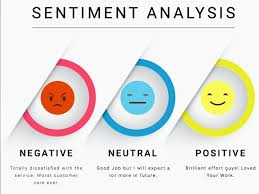

In [2]:
from IPython.display import Image
Image(filename = '/Users/amy/00_Springboard/14_Capstone_Project_2/sentiment.jpg')

Sentiment polarity is typically a numeric score which is assigned to both the positive and negative aspects of a text document based on subjective parameters like specific words and phrases expressing feelings and emotion. Neutral sentiment typically has 0 polarity since it does not express any specific sentiment, positive sentiment will have polarity > 0 and negative < 0. Of course you can always change these thresholds based on the type of text you are dealing with and there are no hard constraints on this.

Unsupervised sentiment analysis models make use of well curated knowledgebases, ontologies, lexicons and databases which have detailed information pertaining to subjective words, phrases including sentiment, mood, polarity, objectivity, subjectivity and so on. A lexicon model typically uses a lexicon, also known as a dictionary or vocabulary of words specifically aligned towards sentiment analysis. Usually these lexicons contain a list of words associated with positive and negative sentiment, polarity (magnitude of negative or positive score), parts of speech (POS) tags, subjectivity classifiers (strong, weak, neutral), mood, modality and so on.

## Import Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import nltk

import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score


from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer

from nltk import word_tokenize
nltk.download('stopwords')
import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to /Users/amy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
np.set_printoptions(precision=2, linewidth=80)

## Load and View Dataset

In [5]:
df = pd.read_csv('cleaned_text_school_supplies.csv')

In [6]:
df.isnull().sum()

customer_ID        0
product_ID         0
rating             0
review_text        0
rating_class       0
date_time          0
normalized_text    1
tokens             0
dtype: int64

In [7]:
df = df.dropna(axis=0)

In [8]:
# Converting categorical to numerical 
df['rating_class'] = df['rating_class'].replace({'good': 1,'neutral': 0,'bad':0 })
# Converting categorical to numerical 
df['rating_class'] = df['rating_class'].replace({1: 'good',0 :'bad' })

In [9]:
df.head(2)

,customer_ID,product_ID,rating,review_text,rating_class,date_time,normalized_text,tokens
0,0136039847,A2MVR1VMDPMNGS,1.0,I honestly believe that giving this merchant o...,bad,2014-03-03,honestly believe give merchant one star favor ...,"['honestly', 'believe', 'give', 'merchant', 'o..."
1,0439504422,ASTJ36CFZRN3O,5.0,This is a standard size folder that fits stand...,good,2012-09-18,standard size folder fit standard paper 5x11 f...,"['standard', 'size', 'folder', 'fit', 'standar..."


## Extract data for model evaluation

In [10]:
df_train = df[:8000]
df_test = df[8000:]

In [11]:
text_reviews = df['review_text'].values
test_text_reviews = text_reviews [8000:]

sentiments = df['rating_class'].values
test_sentiments = sentiments[8000:]

sample_review_ids = [1201, 805, 305] 

# Sentiment Analysis with TextBlob

TextBlob is a Python library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

Typically, specific adjectives have a **polarity score** (**negative/positive**, -1.0 to +1.0) and a **subjectivity score**    (objective/subjective, +0.0 to +1.0) associated with them.

## Try out sentiment analysis with three examples

In [12]:
import textblob

for review, sentiment in zip(test_text_reviews[sample_review_ids], test_sentiments[sample_review_ids]):
    print('REVIEW:',review, sep='\n')
    print('Actual Sentiment:', sentiment)
    print('Predicted Sentiment polarity:', textblob.TextBlob(review).sentiment.polarity)
    print('-'*60)

REVIEW:
Maybe I should have figured based on the price but I honestly thought it couldn't be that expensive for a good quality real chalkboard.This thing arrived, box in perfect condition but the chalkboard and frame itself are complete crap. The pine frame is unfinished and splintery. It was also mis-meausred and didn't meet at the corners. The one corner piece was straight up broken and had a splinter half the width of the too frame piece running down and disconnecting from half the length of the top piece. So disappointed. Even if $20 is s good deal for a chalkboard..you can hardly call this a chalkboard. Its some kind of woodish material painted black...seems like the finish of it is going to scrape right off..at least after some use. Wish I would have read more reviews first..as most people have the same issues with theirs. I don't have the time or patience to mess around with a return (which is probably exactly what they ate counting on) but I will be writing to the people who ma

## Predict sentiment on all the test reviews

In [14]:
sentiment_polarity = [textblob.TextBlob(review).sentiment.polarity for review in test_text_reviews]

In [26]:
predicted_sentiments = ['good' if score >= 0.1 else 'bad' for score in sentiment_polarity]

In [27]:
len(predicted_sentiments)

2835

In [28]:
len(test_sentiments)

2835

In [29]:
print(accuracy_score(test_sentiments, predicted_sentiments))

0.7749559082892417


In [30]:
print (classification_report(test_sentiments, predicted_sentiments))

             precision    recall  f1-score   support

        bad       0.57      0.56      0.57       739
       good       0.85      0.85      0.85      2096

avg / total       0.77      0.77      0.77      2835



In [31]:
print(confusion_matrix(test_sentiments, predicted_sentiments))

[[ 417  322]
 [ 316 1780]]


# Sentiment Analysis with AFINN

The AFINN lexicon is perhaps one of the simplest and most popular lexicons which can be used extensively for sentiment analysis. Developed and curated by Finn Årup Nielsen.
The current version of the lexicon is AFINN-en-165.txt which contains over 3300+ words with a polarity score associated with each word.

The author has also created a wrapper library on top of this in Python called afinn which we will be using here.

## Try out sentiment analysis with three examples

In [32]:
from afinn import Afinn

afn = Afinn(emoticons=True)

In [37]:
for review, sentiment in zip(test_text_reviews[sample_review_ids], test_sentiments[sample_review_ids]):
    print('REVIEW:', review)
    print('Actual Sentiment:', sentiment)
    print('Predicted Sentiment polarity:', afn.score(review))
    print('-'*60)

REVIEW: Maybe I should have figured based on the price but I honestly thought it couldn't be that expensive for a good quality real chalkboard.This thing arrived, box in perfect condition but the chalkboard and frame itself are complete crap. The pine frame is unfinished and splintery. It was also mis-meausred and didn't meet at the corners. The one corner piece was straight up broken and had a splinter half the width of the too frame piece running down and disconnecting from half the length of the top piece. So disappointed. Even if $20 is s good deal for a chalkboard..you can hardly call this a chalkboard. Its some kind of woodish material painted black...seems like the finish of it is going to scrape right off..at least after some use. Wish I would have read more reviews first..as most people have the same issues with theirs. I don't have the time or patience to mess around with a return (which is probably exactly what they ate counting on) but I will be writing to the people who ma

## Predict sentiment on all the test reviews

In [40]:
sentiment_polarity = [afn.score(review) for review in test_text_reviews]
predicted_sentiments = ['good' if score >= 1.0 else 'bad' for score in sentiment_polarity]

In [41]:
print(accuracy_score(test_sentiments, predicted_sentiments))

0.8038800705467373


In [42]:
print (classification_report(test_sentiments, predicted_sentiments))

             precision    recall  f1-score   support

        bad       0.70      0.44      0.54       739
       good       0.82      0.93      0.88      2096

avg / total       0.79      0.80      0.79      2835



In [43]:
print(confusion_matrix(test_sentiments, predicted_sentiments))

[[ 324  415]
 [ 141 1955]]


# Sentiment Analysis with VADER

The VADER lexicon, developed by C.J. Hutto is a lexicon which is based on a rule-based sentiment analysis framework, specifically tuned to analyze sentiments in social media. VADER stands for Valence Aware Dictionary and sEntiment Reasoner.

You can use the library based on nltk's interface under the nltk.sentiment.vader module.

## Try out sentiment analysis with three examples

In [46]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [58]:
import contractions
from bs4 import BeautifulSoup
import unicodedata
import re

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    return stripped_text


def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text


# def expand_contractions(text):
#     return contractions.fix(text)

In [59]:
def analyze_sentiment_vader_lexicon(review, 
                                    threshold=0.1,
                                    verbose=False):
    # pre-process text
    review = strip_html_tags(review)
    review = remove_accented_chars(review)
#     review = expand_contractions(review)
    
    # analyze the sentiment for review
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    # get aggregate scores and final sentiment
    agg_score = scores['compound']
    final_sentiment = 'good' if agg_score >= threshold\
                                   else 'bad'
    if verbose:
        # display detailed sentiment statistics
        positive = str(round(scores['pos'], 2)*100)+'%'
        final = round(agg_score, 2)
        negative = str(round(scores['neg'], 2)*100)+'%'
        neutral = str(round(scores['neu'], 2)*100)+'%'
        sentiment_frame = pd.DataFrame([[final_sentiment, final, positive,
                                        negative, neutral]],
                                        columns=pd.MultiIndex(levels=[['SENTIMENT STATS:'], 
                                                                      ['Predicted Sentiment', 'Polarity Score',
                                                                       'Good', 'Bad', 'Neutral']], 
                                                              labels=[[0,0,0,0,0],[0,1,2,3,4]]))
        print(sentiment_frame)
    
    return final_sentiment

In [60]:
for review, sentiment in zip(test_text_reviews[sample_review_ids], test_sentiments[sample_review_ids]):
    print('REVIEW:', review)
    print('ACTUAL SENTIMENT:', sentiment)
    pred = analyze_sentiment_vader_lexicon(review, threshold=0.4, verbose=True)    
    print('-'*60)

REVIEW: Maybe I should have figured based on the price but I honestly thought it couldn't be that expensive for a good quality real chalkboard.This thing arrived, box in perfect condition but the chalkboard and frame itself are complete crap. The pine frame is unfinished and splintery. It was also mis-meausred and didn't meet at the corners. The one corner piece was straight up broken and had a splinter half the width of the too frame piece running down and disconnecting from half the length of the top piece. So disappointed. Even if $20 is s good deal for a chalkboard..you can hardly call this a chalkboard. Its some kind of woodish material painted black...seems like the finish of it is going to scrape right off..at least after some use. Wish I would have read more reviews first..as most people have the same issues with theirs. I don't have the time or patience to mess around with a return (which is probably exactly what they ate counting on) but I will be writing to the people who ma

## Predict sentiment on all the test reviews

In [61]:
predicted_sentiments = [analyze_sentiment_vader_lexicon(review, threshold=0.4, verbose=False) for review in test_text_reviews]

In [62]:
print(accuracy_score(test_sentiments, predicted_sentiments))

0.8045855379188712


In [63]:
print (classification_report(test_sentiments, predicted_sentiments))

             precision    recall  f1-score   support

        bad       0.62      0.63      0.63       739
       good       0.87      0.86      0.87      2096

avg / total       0.81      0.80      0.81      2835



In [64]:
print(confusion_matrix(test_sentiments, predicted_sentiments))

[[ 469  270]
 [ 284 1812]]


# Conclusion:

**Vader** gives the best score with an overall F1-Score and model accuracy of 81%.

The second best is **the AFINN** based model which gives an overall F1-Score and model accuracy of 80%